In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Data exploration

In [115]:
df = pd.read_csv('kc_house_data.csv', index_col='id')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


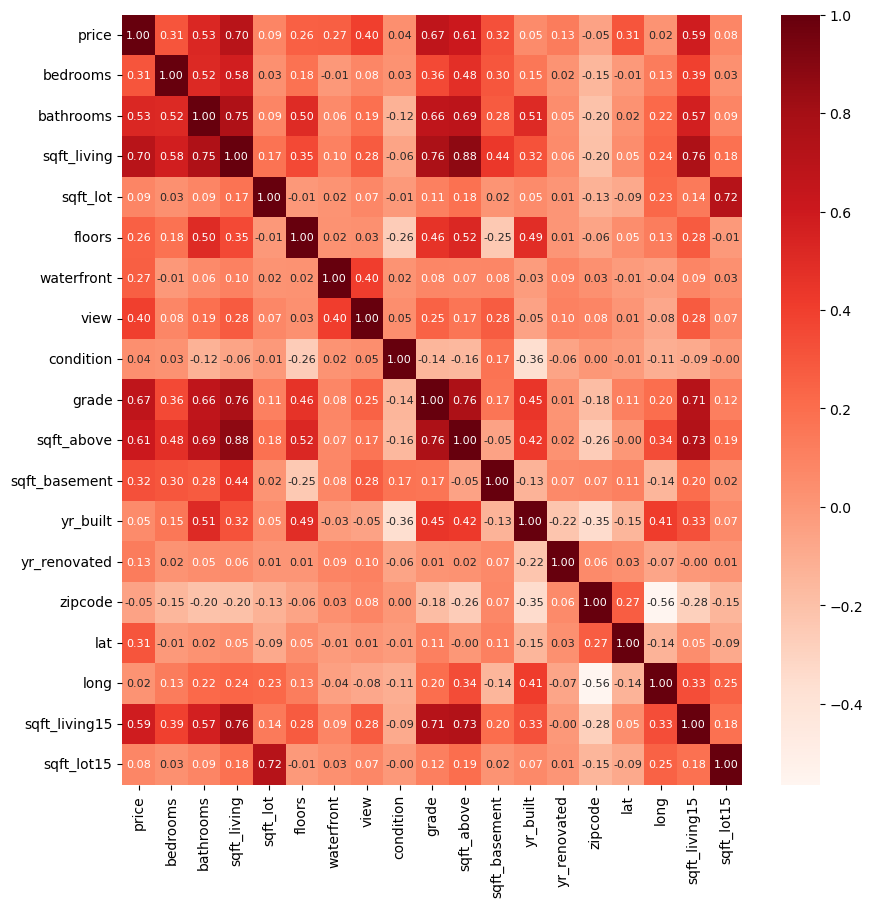

In [116]:
# Matrix de coorelation de DataFrame
coor = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(coor, annot=True, cmap=plt.cm.Reds, fmt='.2f',annot_kws={"fontsize":8})
plt.show()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

## Rescale and feature engineering to a new DataFrame

In [118]:
new_df = df.drop(['date', 'zipcode', 'yr_renovated'], axis=1)

<AxesSubplot:ylabel='Frequency'>

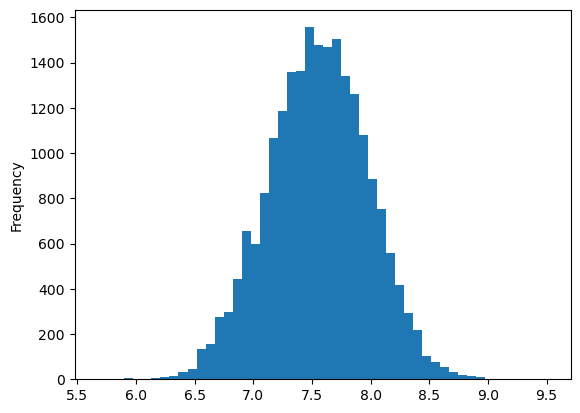

In [119]:
np.log(new_df['sqft_living']).plot.hist(bins=50)

In [125]:
# Rescale data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
new_df['sqft_living'] = normalizer.fit_transform(new_df['sqft_living'].values.reshape(-1,1))
new_df['sqft_lot'] = normalizer.fit_transform(new_df['sqft_lot'].values.reshape(-1,1))
new_df['sqft_above'] = normalizer.fit_transform(new_df['sqft_above'].values.reshape(-1,1))
new_df['sqft_basement'] = normalizer.fit_transform(new_df['sqft_basement'].values.reshape(-1,1))
new_df['sqft_living15'] = normalizer.fit_transform(new_df['sqft_living15'].values.reshape(-1,1))
new_df['sqft_lot15'] = normalizer.fit_transform(new_df['sqft_lot15'].values.reshape(-1,1))
new_df['yr_built'] = normalizer.fit_transform(new_df['yr_built'].values.reshape(-1,1))
new_df['lat'] = normalizer.fit_transform(new_df['lat'].values.reshape(-1,1))
new_df['long'] = normalizer.fit_transform(new_df['long'].values.reshape(-1,1))
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,-1.0,-1.0,1.0,0,0,3,7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6414100192,538000.0,3,2.25,1.0,-1.0,2.0,0,0,3,7,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
5631500400,180000.0,2,1.00,-1.0,-1.0,1.0,0,0,3,6,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
2487200875,604000.0,4,3.00,-1.0,-1.0,1.0,0,0,5,7,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1954400510,510000.0,3,2.00,-1.0,-1.0,1.0,0,0,3,8,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,-1.0,-1.0,3.0,0,0,3,8,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
6600060120,400000.0,4,2.50,1.0,-1.0,2.0,0,0,3,8,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1523300141,402101.0,2,0.75,-1.0,-1.0,2.0,0,0,3,7,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0


## Scatterplot Matrix

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='lat', ylabel='price'>,
        <AxesSubplot:xlabel='long', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot15', ylabel='price'>],
       [<AxesSubplot:xlabel='p

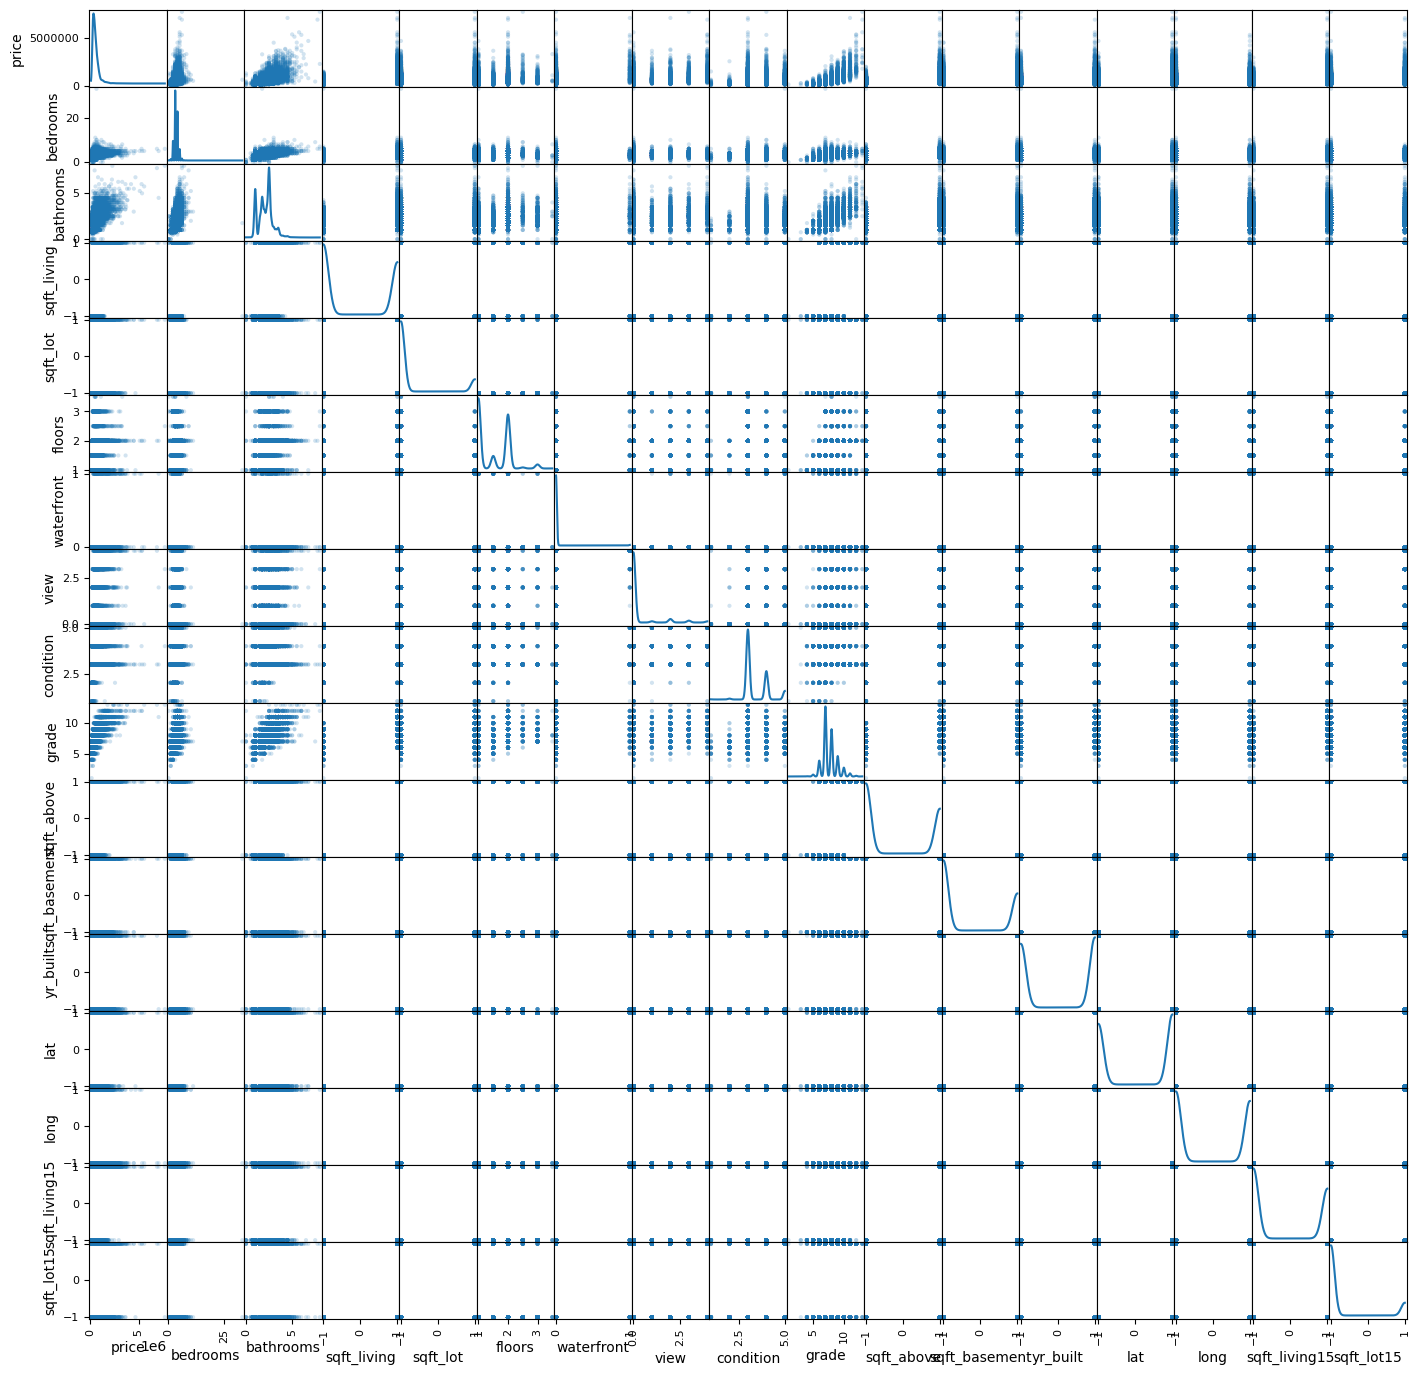

In [130]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_df, alpha=0.2, figsize=(17, 17), diagonal='kde')

## Linear regression model

In [126]:
X = new_df.drop('price', axis=1)
y = new_df['price']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
5100402668,3,1.00,-1.0,-1.0,1.0,0,0,4,7,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
7856560480,3,2.50,-1.0,-1.0,1.0,0,0,4,8,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
2872900010,3,1.50,-1.0,-1.0,1.0,0,0,3,8,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
3216900070,4,2.50,1.0,-1.0,2.0,0,0,3,8,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
976000790,3,2.50,-1.0,-1.0,2.0,0,0,3,7,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322069010,5,5.00,1.0,1.0,2.0,0,0,3,10,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
2114700368,2,2.50,-1.0,-1.0,2.0,0,0,3,8,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
5469501200,3,2.25,1.0,-1.0,1.0,0,0,4,9,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0


In [128]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6537567201457679

In [124]:
# Data scatter of predicted values
y_pred = model.predict(X_test)
y_pred, y_test

(array([ 379824.39845475, 1520132.09686934,  535192.63307498, ...,
         348266.82410121,  202975.57538713,  403521.86733752]),
 id
 1453602313     297000.0
 2225059214    1578000.0
 2768000270     562100.0
 6819100040     631500.0
 4027700666     780000.0
                 ...    
 3528000545     844000.0
 526059259      335500.0
 339600090      369950.0
 7750500120     300000.0
 267000170      575950.0
 Name: price, Length: 4323, dtype: float64)

## K-Fold Cross Validation

In [ ]:
#Implementing cross validation
def cross_val(model, X, y, k = 5):
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error
    kf = KFold(n_splits=k, random_state=None)
    acc_score = []
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
        acc = mean_squared_error(y_test, pred_values)
        acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    return avg_acc_score
